In [ ]:
Clustering: K-Means 
Dataset: Cities_r2.csv
Apply Data pre-processing (Label Encoding , Data 
Transformation….) techniques ifnecessary.
Apply K-Means clustering algorithms (based on
effective_literacy_rate_total column) to find the group of customers.

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("cities_r2.csv")

In [5]:
data.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

In [8]:
numeric_data = data.drop(['name_of_city','state_name','location'],axis = 1)

In [9]:
label_encoder = LabelEncoder()

In [11]:
data['name_of_city'] = label_encoder.fit_transform(data['name_of_city'])
data['state_name'] = label_encoder.fit_transform(data['state_name'])
data['location'] = label_encoder.fit_transform(data['location'])

In [13]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(numeric_data)

In [14]:
X = scaler_data[:,numeric_data.columns.get_loc('effective_literacy_rate_total')]

In [15]:
X = X.reshape(-1,1)

In [16]:
kmeans = KMeans(n_clusters=3,random_state=42)

In [17]:
kmeans.fit(X)

C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\ADMIN\Desktop\sample_project_1\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Window

KMeans(n_clusters=3, random_state=42)

In [18]:
data['cluster'] = kmeans.labels_

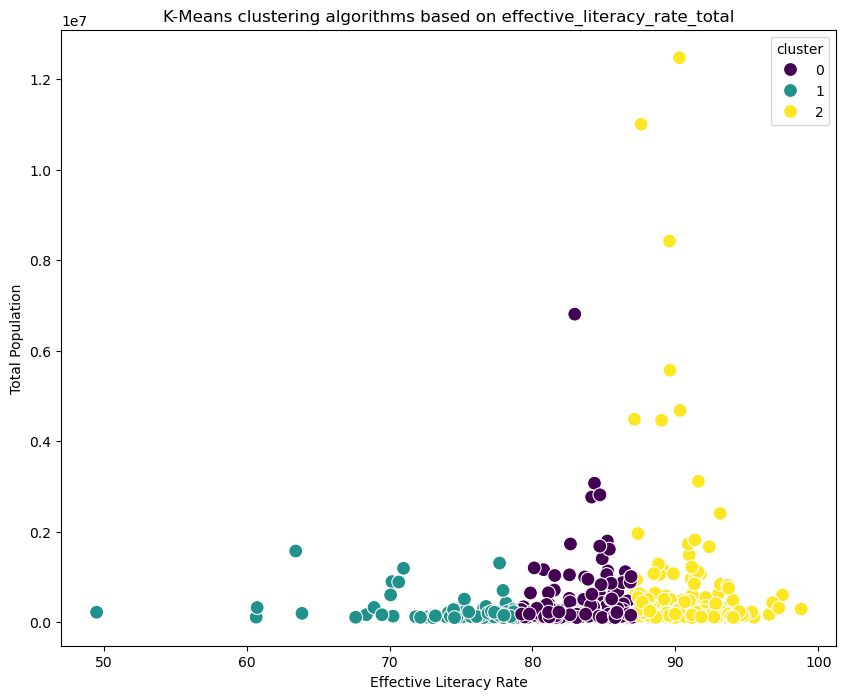

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'effective_literacy_rate_total',y = 'population_total',hue = 'cluster',data = data,palette='viridis',s = 100)
plt.title("K-Means clustering algorithms based on effective_literacy_rate_total")
plt.xlabel('Effective Literacy Rate')
plt.ylabel('Total Population')
plt.show()